In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# df1 = pd.read_csv(r"C:\Users\jrhuggi\Downloads\archive\movies_metadata.csv", sep =",")
# df2 = pd.read_csv(r"C:\Users\jrhuggi\Downloads\archive\ratings.csv", sep=",")

In [4]:
df1['id'] = df1['id'].str.replace(r'\D', '', regex=True).astype('int64')

In [5]:
merged_df = df1.merge(df2, left_on='id', right_on='movieId', how='inner')

In [6]:
merged_df = merged_df.drop_duplicates(subset=['movieId', 'id'], keep='first')
merged_df

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,status,tagline,title,video,vote_average,vote_count,userId,movieId,rating,timestamp
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,Released,NaN,Toy Story,False,7.7,5415.0,1923,862,3.0,858335006
374,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,7016,8844,4.0,1257352229
497,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0,174,949,4.0,956976196
2842,False,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,...,Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0,619,710,3.0,831609119
4161,False,NaN,98000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,1408,tt0112760,en,Cutthroat Island,"Morgan Adams and her slave, William Shaw, are ...",...,Released,The Course Has Been Set. There Is No Turning B...,Cutthroat Island,False,5.7,137.0,15,1408,5.0,1346008714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11436495,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,98604,tt2147597,ru,Zolushka,"Masha Krapivina - is yet beautiful, and not th...",...,Released,NaN,Cinderella,False,4.6,6.0,1846,98604,3.5,1492164029
11436778,False,NaN,0,"[{'id': 10402, 'name': 'Music'}, {'id': 35, 'n...",NaN,5589,tt0232750,cs,Šíleně smutná princezna,No overview found.,...,Released,NaN,Šíleně smutná princezna,False,6.1,4.0,46,5589,3.0,1056350877
11437107,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 9648, 'n...",NaN,45527,tt1331329,en,The Final Storm,A stranger named Silas flees from a devastatin...,...,Released,"Action, Horror",The Final Storm,False,3.7,11.0,43537,45527,3.5,1299434945
11437119,False,NaN,0,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",NaN,49280,tt0135453,fr,L'Homme orchestre,A band-leader has arranged seven chairs for th...,...,Released,NaN,The One-Man Band,False,6.5,22.0,11,49280,1.5,1231676352


In [7]:
columns_to_drop = ['adult', 'belongs_to_collection', 'movieId', 'budget', 'homepage', 'imdb_id', 'original_language', 'original_title', 'overview', 'popularity', 'poster_path', \
                   'production_countries', 'release_date', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'video', 'vote_average', 'vote_count', 'userId', \
                    'production_companies', 'timestamp']
merged_df.drop(columns=columns_to_drop, inplace=True)

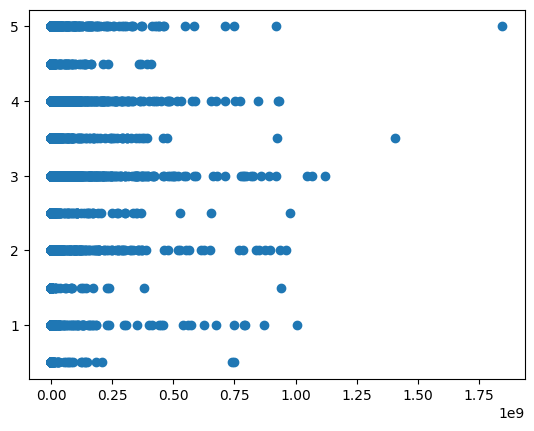

In [8]:
plt.scatter(merged_df['revenue'], merged_df['rating'])

In [9]:
# merged_df.to_csv("revenueVsRatings.csv")

In [3]:
df = pd.read_csv(r"revenueVsRatings.csv", sep=",")

In [6]:
average_revenue_by_rating = df.groupby("rating")["revenue"].mean()

In [15]:
df3 = pd.DataFrame(average_revenue_by_rating)
df3.reset_index(inplace=True)
df3.to_csv("average_revenue_by_rating.csv")

<BarContainer object of 10 artists>

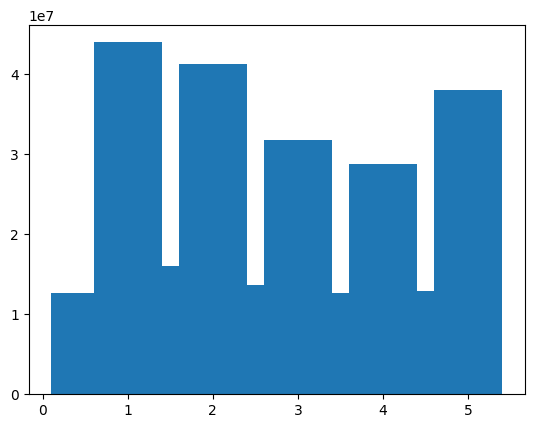

In [14]:
plt.bar(df3['rating'], df3['revenue'])